# Sentiment Analysis On Global Warming
--------------------------------------
Motivation: The goal of this project is to determine the opinions of people on global warming from 2000 tweets from Twitter between 2019-08-01 and 2019-12-01.

Procedure: 

1. Importing Neccessary Libraries
2. Data Aggregation 
3. Preprocessing Data
4. Determining Polarity and Subjectivity
5. Plotting Results
6. Conclusion

# Importing Neccessary Libraries
--------------------------------
For this project I used: 
* twint for data aggregation from twitter
  1. Twint is a Twitter scraping tool which allows for quick scraping of tweets from user profiles.
* langdetect, re, and Textblob, pandas for preprocessing
  1. langdetect is a library which allows us to detect what language is presented in the text.
  2. re is python's built in Regular Expressions library. It allows for easy ways to clean the data by looking for specific patterns and removing them. 
  3. Textblob is a Natural Language Processing Library that allows for easy sentiment analysis and also allows for some cleaning. In the Preprocessing section I used it to attempt to correct the grammatical spelling of tweets in order to get a more accurate sentiment analysis score.
  4. Pandas is a library which allows for easy storage and indexing of the processed data.

* Textblob for Determing Polarity and Subjectivity
  1. Textblob has built in methods that allow for easy computation of sentiment and polarity scores.   

* WordCloud and MatplotLib for Plotting Results
  1. WordCloud is a visualization library which allows you to determine what words appear most often in your dataset.
  2. Matplotlib allows you to plot various different types of graphs to get a better understand of your dataset.

In [ ]:
# Installations for twint and langdetect

!pip3 install -qq twint
!pip install nest_asyncio
!pip3 install langdetect


In [ ]:
import nest_asyncio
import twint
import pandas as pd
import re
import numpy as np
from langdetect import detect
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
nest_asyncio.apply()

# Data Aggregation: 
-------------------
For data aggregation I used Twint, a small library for scraping tweets from Twitter. For this project, I wanted to gain 2000 tweets about Global Warming between 2019-08-01 and 2019-12-31. The reason I chose this time range is because this time range was before the Coronavirus began, and I wanted to exclude any mentions of Coronavirus from my dataset. I stored the tweets I got into a CSV for easy access later on.

In [ ]:
# Data Gathering

specs = twint.Config()
specs.Search = "Global Warming"
specs.Limit = 2000
specs.Since = "2019-08-01 12:00:00"
specs.Until = "2019-12-31 12:00:00"
specs.Format = "Tweet id: {id} | Date: {date} | Time: {time} | Tweet: {tweet}"
specs.Store_csv = True
specs.Output = "GlobalWarmingTweets"
twint.run.Search(specs)

#Preprocessing Data
-------------------
Before doing sentiment analysis, I had to clean my dataset of tweets. I removed the following from all tweets (tweets of any language other than english were filtered using langdetect): 
  1. URLs
  2. Mentions
  3. Links to pictures
  4. Hashtags

I also tried to correct the syntax of the text using TextBlob's built in correct method in order to hopefully get a more accurate polarity and subjectivity score. I did this in order to get a more accurate and fair representation of people's opinions and in order to make sentiment analysis more accurate.

In [ ]:
# Load data from CSV

globalWarmingTweets = pd.read_csv("GlobalWarmingTweets/tweets.csv", usecols=["tweet"]) # stores tweets
globalWarmingTweets = globalWarmingTweets.to_numpy()

# clean data
# remove links, mentions, and any language that is not english from the testing dataset
# also attempted to remove bot tweets and tweets unrelated to global warming

def removeEmoji(text):
  return text.encode('ascii', 'ignore').decode('ascii')


filteredTweets = []

for tweet in globalWarmingTweets:
 
  if detect(tweet[0]) == "en": # removes any language that is not english
    currTweet = tweet[0]
    currTweet = removeEmoji(currTweet)
    currTweet = re.sub(r'#\w+ ?', '', currTweet) 
    currTweet = re.sub(r'http\S+', '', currTweet)
    currTweet = re.sub(r'\s\s+', ' ', currTweet)
    currTweet = re.sub(r'pic.twitter.com\S+', '', currTweet)
    currTweet = re.sub(r'@\w+ ?', '', currTweet)
    currTweet = currTweet.replace("\n", " ")
    currTweet = currTweet.lower()
    currTweet = TextBlob(currTweet)
    currTweet = currTweet.correct()
    currTweet = str(currTweet)
    if not("global warming" in currTweet):
        currTweet = ''
    
    if len(currTweet) != 0:
      filteredTweets.append(currTweet)

filteredTweets = pd.DataFrame(filteredTweets, columns=['Filtered_Tweets']) # converted 
print(filteredTweets)  

                                        Filtered_Tweets
0     we need to care for both for big-diversity and...
1                              global warming be like: 
2     climate change: if you worry about global warm...
3     for a minute i thought you were talking about ...
4     anthropogenic greenhouse gas build up in atmos...
...                                                 ...
1574  i st i will personally punch anyone who says g...
1575  because global warming is crazy may the sun is...
1576  you are not curious,your being mischievous, is...
1577  the very mention of carbon dioxide legitimists...
1578  black bear news: britain is set for warmest ne...

[1579 rows x 1 columns]


#Determining Subjectivity and Polarity
--------------------------------------

In order to determine the Polarity and Subjectivity, I used TextBlob's built-in subjectivity and polarity methods to get sentiment scores. The Polarity score ranges between [-1,1]. Anything below -.02 was classified as a negative opinion tweet and everything above .02 was classified as positive opinion tweet. I also used the WordCloud library to determine how the sentiments were distributed. The subjectivity score was used later, and it ranges from [0,1], with 1 being heavily opinionated and 0 was being completely factual. The most common words were:
1. Global Warming
2. Climate Change
3. People
4. Warming Climate
5. Earth

The WordCloud doesn't tell us anything about the context of the word itself, but it does shed light on words most commonly used to describe Global Warming. I then printed out the postive tweets, negative tweets, and neutral tweets in order to see what was classified as a positive tweet, a negative tweet, and a neutral tweet. This is where I started to encounter problems as it was very difficult to understand how the polarity was distributed among the tweets. The built in TextBlob method seemed to have a really difficult time distinguishing between sarcasm and genuine concern. One way to fix this would be to provide my own data set of positive and negative tweets and train the classifer on that instead of using TextBlog's built in dataset (which is what I am doing now).  There were tweets that should have been classified as positive and instead were classified as neutral or negative, and visa versa. This issue may therefore make the conclusion biased and not fully representative of the entire population of Twitter.



In [62]:
# Create a function to get subjectivity (How opinionated a text is)
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity (how positive or negative a text is)
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

filteredTweets['Subjectivity'] = filteredTweets['Filtered_Tweets'].apply(getSubjectivity)
filteredTweets['Polarity'] = filteredTweets['Filtered_Tweets'].apply(getPolarity)

print(filteredTweets)


                                        Filtered_Tweets  ...  Analysis
0     we need to care for both for big-diversity and...  ...  Positive
1                              global warming be like:   ...   Neutral
2     climate change: if you worry about global warm...  ...   Neutral
3     for a minute i thought you were talking about ...  ...  Positive
4     anthropogenic greenhouse gas build up in atmos...  ...  Negative
...                                                 ...  ...       ...
1574  i st i will personally punch anyone who says g...  ...  Positive
1575  because global warming is crazy may the sun is...  ...  Negative
1576  you are not curious,your being mischievous, is...  ...   Neutral
1577  the very mention of carbon dioxide legitimists...  ...  Positive
1578  black bear news: britain is set for warmest ne...  ...  Negative

[1579 rows x 4 columns]


(-0.5, 799.5, 799.5, -0.5)

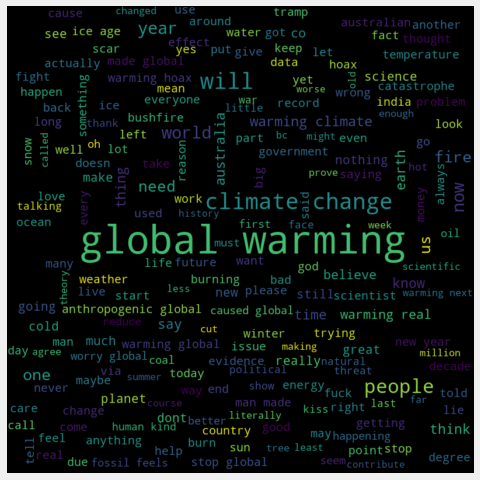

In [61]:
# Created a Word Cloud to see how well the sentiments are distributed
allWords = ''
for tweet in filteredTweets['Filtered_Tweets']:
  allWords += tweet + ' '

wordCloud = WordCloud(width = 800, height = 800, background_color = 'black').generate(allWords)

plt.figure(figsize=(8,8))
plt.imshow(wordCloud, interpolation="bilinear")
plt.grid(b=None)
plt.axis("off")


In [63]:
# Function for analyzing scores

def analysis(score):
  if score > 0.02:
    return 'Positive'
  elif score < -0.02:
    return 'Negative'
  return 'Neutral'

filteredTweets['Analysis'] = filteredTweets['Polarity'].apply(analysis)

In [64]:
# Print all of the Positive Tweets
tweets = filteredTweets[['Filtered_Tweets', 'Analysis']].to_numpy()

count = 0
for tweet in tweets: 
  if tweet[1] == 'Positive':
    print(f'{tweet[1]}: {tweet[0]}')
    print("\n")
    count += 1

print(f'Number of positive tweets is: {count}')

#Note: It seems that postiive tweets are a mix of people being concerned about global warming and sarcasm related to global warming, this will be biased

Positive: we need to care for both for big-diversity and global warming. to be aware of changes we make on one front are not detrimental to the other.


Positive: for a minute i thought you were talking about global warming because that statement almost sounds like a reasonable response.


Positive: not if global warming and the current political and economical climate has anything to do with it 


Positive: mass groupthink hysteria will get worse with the spread of social media. the radical anti-capitalists have a new platform. we've seen it before, communism, the paris, various islamic revolutions. great is swedish and they invented acid rain and global warming. 


Positive: the atmosphere is made up of 0.04% co. humans contribute 3% of that 0.04%. it is a lie to say that this is significant enough to cause global warming. the demonisation of co is a hoax, designed for an attack on coal and gas, feels developing countries need.


Positive: if we get old enough and die then the global

In [65]:
# Print all Negative Tweets

count = 0
for tweet in tweets: 
  if tweet[1] == 'Negative':
    print(f'{tweet[1]}: {tweet[0]}')
    print("\n")
    count += 1

print(f'Number of Negative tweets is: {count}')

Negative: anthropogenic greenhouse gas build up in atmosphere plus greenhouse gas missions from natural sources = global warming = positive feedback = tapping point :-( no going back . half the planet becomes indubitable!


Negative: we get this type of thing in the up. build houses on flood plain, don't dredge the rivers because of greenish and then act surprised when it floods. caused by global warming of course.


Negative: co admitted he hated seeing 'young people so unhappy, so anxious' about the impact of global warming from increasing carbon missions. via 


Negative: despite hours of disruption and tense moments between protests and d.c. police, officials say no arrests were made of "shut down do" global warming demonstrator. 


Negative: frankly history won't be kind to the us and russians period. uncontrolled capitalism, underlying and resolved racism, guns everywhere and kiss shot in school, disgraceful war wondering and pathetic record re global warming. you are the villain

In [66]:
# Print all of the Neutral Tweets: 

count = 0
for tweet in tweets: 
  if tweet[1] == 'Neutral':
    print(f'{tweet[1]}: {tweet[0]}')
    print("\n")
    count += 1

print(f'Number of Neutral tweets is: {count}')


Neutral: global warming be like: 


Neutral: climate change: if you worry about global warming, the next car you buy should be electric 


Neutral: you need to see this. if you think global warming is a hoax you need to see this. then act. 


Neutral: a scientists view of global warming. 


Neutral: global warming is the long-term rise in the average temperature of the earth's climate system. it is a major aspect of climate change, and has been demonstrated by direct temperature measurement and by measurement of various effects of the warming. 


Neutral: global warming myth is part of global government tools, started in 1991, and deceptive to access your fear. 


Neutral: all no need to wait for an osteoid to wipe humans out. global warming can do that sooner


Neutral: climate change: if you worry about global warming, the next car you buy should be electric 


Neutral: casualties of global warming. 


Neutral: climate change: if you worry about global warming, the next car you buy s

#Plotting Results
-----------------
In order to understand the relationship between Polarity and Subjectivity better, I decided to use a scatter plot and have Polarity be on my X-Axis and Subjectivity on my Y-Axis. The results are shown below. The green data points represent all positive polarity tweets, the blue data points represent the neutral datapoints, and the red datapoints represent the negative tweets. There were 635 positive tweets, 441 negative tweets, and 503 neutral tweets. The total number of tweets after filtering and preprocessing was 1579.

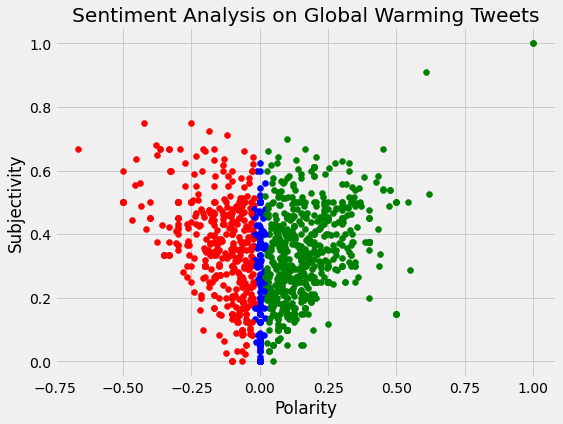

In [67]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
polarity = filteredTweets['Polarity'].to_numpy()
subjectivity = filteredTweets['Subjectivity'].to_numpy()
analysis = filteredTweets['Analysis'].to_numpy()

for i in range(len(polarity)):
  if analysis[i] == "Positive": 
    plt.scatter(polarity[i], subjectivity[i], color='Green')
  if analysis[i] == "Negative":
    plt.scatter(polarity[i], subjectivity[i], color='Red')
  if analysis[i] == "Neutral":
     plt.scatter(polarity[i], subjectivity[i], color='Blue')

plt.title('Sentiment Analysis on Global Warming Tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()



#Conclusion
-----------
After analyzing the data, the conclusion I have made is that the sentiment analysis is most likely wrong. This is because I have used the built in TextBlob methods without providing a training set of my own. Because of this, polarity and subjectivity are getting determined incorrectly, and therefore making any conclusion off of this would probably result in incorrect inferences about people's opinions on Twitter in regards to Global Warming. 

TextBlob's methods are trained on a generic dataset and therefore may provide incorrect information conclusion on specific tweets. The next step in this project for me would be to train my own classifer using Textblob and see if it can potentially interpret these tweets better. Afterwards, I would like to do a prediction test and see if my classifer can classify a tweet which it has not seen before correctly.
